# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt  

In [4]:
# Your code here
data=pd.read_csv('data_all.zip', nrows=75000)

In [5]:
data.head(5)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 449.2 MB


In [7]:
data.shape

(75000, 785)

In [10]:
matriz_datos=data.values 

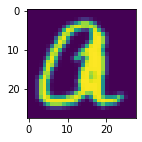

In [11]:
plt.figure(figsize=(2,2))
plt.imshow(matriz_datos[0,1:].reshape(28,28))  
plt.show()

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [13]:
# Your code here
ucases=data.loc[(data.e>=10) & (data.e<36)]
ucases.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
upper_matriz=ucases.values
upper_matriz.shape

(20136, 785)

In [16]:
X=upper_matriz[:,1:]/255

y=upper_matriz[:,0]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape

(16108, 784)

In [19]:
rf=RFC(n_estimators=1000, max_depth=5).fit(X_train, y_train)

In [21]:
from sklearn.metrics import classification_report
total=classification_report(y_test, rf.predict(X_test))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
total

'              precision    recall  f1-score   support\n\n        10.0       0.64      0.66      0.65       138\n        11.0       0.00      0.00      0.00        69\n        12.0       0.60      0.85      0.71       233\n        13.0       1.00      0.01      0.02        94\n        14.0       0.82      0.22      0.35       103\n        15.0       0.69      0.55      0.61       187\n        16.0       0.00      0.00      0.00        37\n        17.0       0.00      0.00      0.00        68\n        18.0       0.49      0.91      0.64       261\n        19.0       0.00      0.00      0.00        91\n        20.0       0.00      0.00      0.00        49\n        21.0       0.89      0.23      0.36       109\n        22.0       0.78      0.96      0.86       193\n        23.0       0.61      0.73      0.66       192\n        24.0       0.66      0.95      0.78       508\n        25.0       0.70      0.82      0.75       189\n        26.0       0.00      0.00      0.00        64\n       

* Try to do the same thing with lowercases.

In [29]:
# Para lowercases:
lcases=data.loc[data.e>35]
lcases.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
lower_matriz=lcases.values
lower_matriz.shape

(17400, 785)

In [32]:
X=lower_matriz[:,1:]/255

y=lower_matriz[:,0]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape

(13920, 784)

In [33]:
from sklearn.svm import SVC
svc=SVC(gamma='auto').fit(X_train, y_train)

In [34]:
classification_report(y_test, svc.predict(X_test))

'              precision    recall  f1-score   support\n\n        36.0       0.77      0.88      0.82       228\n        37.0       0.81      0.77      0.79        95\n        38.0       0.87      0.48      0.62        54\n        39.0       0.85      0.89      0.87       222\n        40.0       0.87      0.94      0.90       504\n        41.0       0.91      0.63      0.74        46\n        42.0       0.65      0.48      0.55        85\n        43.0       0.77      0.86      0.81       180\n        44.0       0.33      0.02      0.04        51\n        45.0       0.84      0.59      0.69        44\n        46.0       0.60      0.40      0.48        53\n        47.0       0.73      0.95      0.83       333\n        48.0       0.88      0.90      0.89        59\n        49.0       0.86      0.93      0.89       245\n        50.0       0.94      0.84      0.89        75\n        51.0       0.83      0.71      0.77        49\n        52.0       0.60      0.47      0.52        45\n       

In [35]:
y_pred=svc.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix as cm
mat_cm=cm(y_test,y_pred)

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

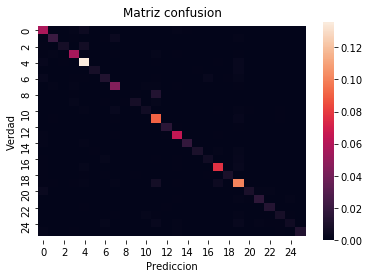

In [49]:
ax=sns.heatmap(mat_cm/sum(sum(mat_cm)))

b, t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

* Try to do the same thing with numbers.

In [39]:
# números
num=data.loc[data.e<10]
num.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
num_matriz=num.values
num_matriz.shape

(37464, 785)

In [43]:
X=num_matriz[:,1:]/255
y=num_matriz[:,0]


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape

(29971, 784)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70,
                          solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
classification_report(y_test, lreg.predict(X_test))

'              precision    recall  f1-score   support\n\n         0.0       0.95      0.95      0.95       708\n         1.0       0.95      0.97      0.96       808\n         2.0       0.96      0.91      0.93       764\n         3.0       0.92      0.93      0.93       795\n         4.0       0.92      0.94      0.93       730\n         5.0       0.89      0.87      0.88       652\n         6.0       0.96      0.95      0.95       745\n         7.0       0.94      0.95      0.95       862\n         8.0       0.91      0.89      0.90       709\n         9.0       0.90      0.92      0.91       720\n\n    accuracy                           0.93      7493\n   macro avg       0.93      0.93      0.93      7493\nweighted avg       0.93      0.93      0.93      7493\n'